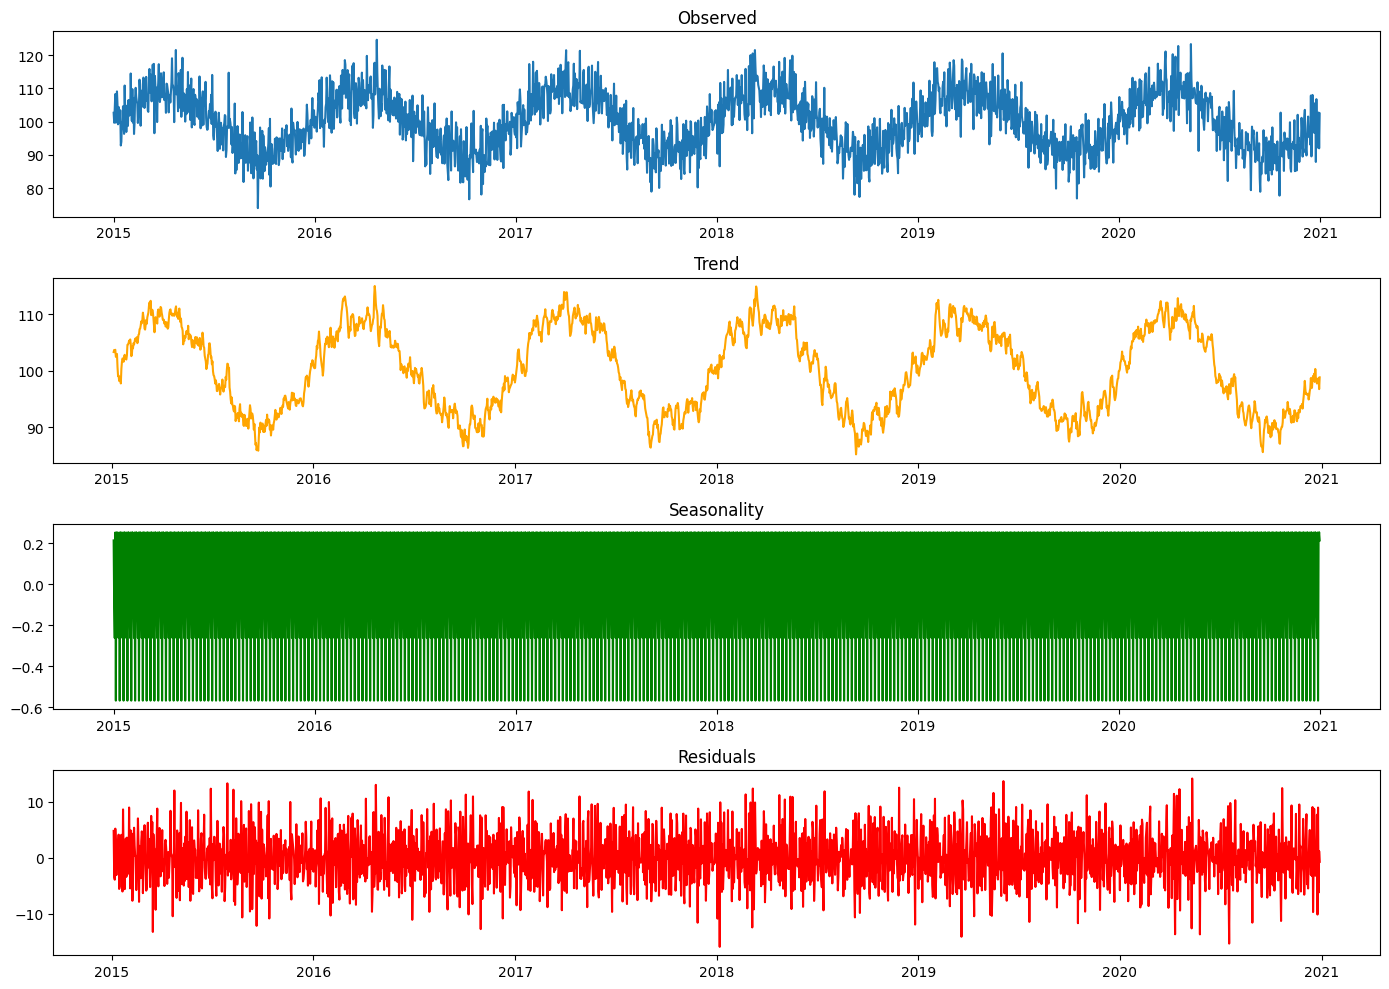

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic AQI dataset for India
np.random.seed(42)
date_range = pd.date_range(start='2015-01-01', end='2020-12-31', freq='D')
aqi_values = 100 + 10 * np.sin(2 * np.pi * date_range.dayofyear / 365.25) + np.random.normal(0, 5, len(date_range))

df = pd.DataFrame({
    'Date': date_range,
    'Country': 'India',
    'AQI Value': aqi_values
})

# Prepare the time series
df_country = df[df['Country'] == 'India'].groupby("Date")['AQI Value'].mean()
df_country = df_country.asfreq('D')
df_country = df_country.interpolate()

# Decompose the time series (additive model)
decomposition = seasonal_decompose(df_country, model='additive')

# Plot all components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, color='orange')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, color='green')
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, color='red')
plt.title('Residuals')

plt.tight_layout()
plt.show()
